In [1]:
from utils import calculate_mean_accuracy, get_radiuses_for_distance_contour_lines, draw_theoretical_accuracies 

import numpy as np
from scipy.optimize import LinearConstraint, NonlinearConstraint, minimize, minimize_scalar

In [2]:
np.random.seed(42)

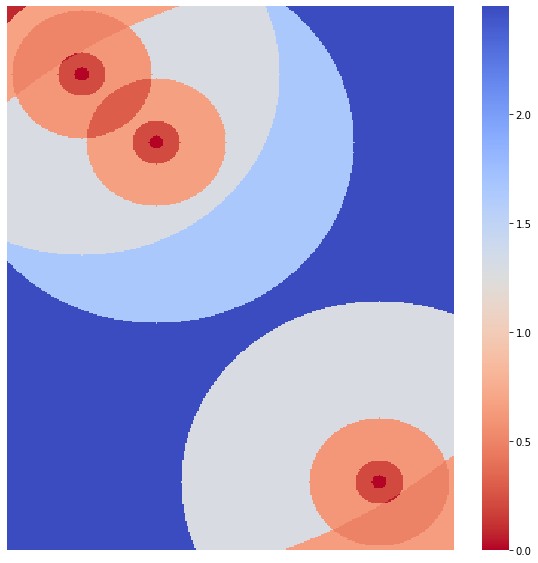

In [3]:
rssi_accuracy = 4
beacons_location = np.array([[0.5, 0.5], [2.5, 3.5], [1, 1]])
# beacons_location = np.array([[0, 0]])
beacon_number = beacons_location.shape[0]

x_len = 3
y_len = 4
delta = 0.01
radiuses = get_radiuses_for_distance_contour_lines(rssi_accuracy)

calculate_mean_accuracy(x_len, y_len, beacons_location, radiuses)

draw_accuracies = lambda locations: draw_theoretical_accuracies(x_len, y_len, locations, radiuses)
draw_accuracies(beacons_location)

# Beacon location optimization

Our goal is to minimize mean accuracy

We have next variables:

$n$ - number of beacons  
$x_{len}$ - max x coordinate of room  
$y_{len}$ - max y coordinate of room

$x_i$, $i=\overline{1,n}$ - x coordinate of nth beacon  
$y_i$, $i=\overline{1,n}$ - y coordinate of nth beacon

We have next constraints:

$ 0 \leq x_i \leq x_{len}$, $i = \overline{1,n} $  
$ 0 \leq y_i \leq y_{len}$, $i = \overline{1,n} $

In [4]:
def beacon_locations_from_x(x):
    x, y = np.split(x, 2)
    return  np.vstack([x, y]).T
    
def obj(x):
    return calculate_mean_accuracy(x_len, y_len, beacon_locations_from_x(x), radiuses)

Initial Objective (Accuracy): 0.6699099035424747


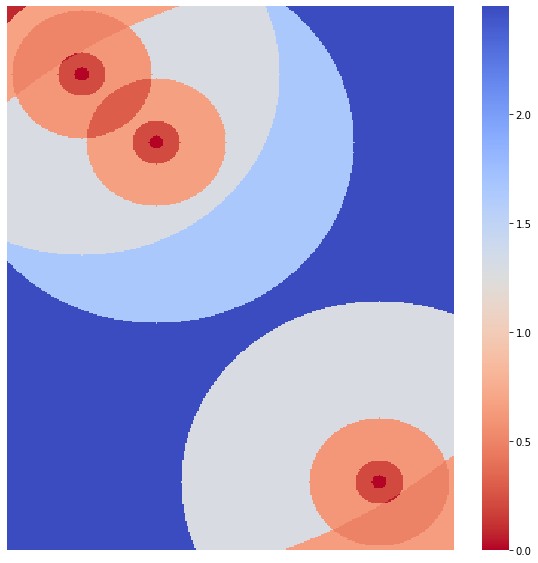

In [5]:
bnds = [(0, x_len) for i in range(beacon_number)] + [(0, y_len) for i in range(beacon_number)]

x0 = np.array([0.5, 2.5, 1, 0.5, 3.5, 1])
# x0 = np.array([1.5, 2])
# x0 = np.ones(beacon_number*2)

# show initial objective
print('Initial Objective (Accuracy): ' + str(obj(x0)))
draw_accuracies(beacon_locations_from_x(x0))

In [6]:
solution = minimize(obj, x0, method='SLSQP', bounds=bnds, tol=0.01, options={"maxiter":1000, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6682634107156029
            Iterations: 1
            Function evaluations: 19
            Gradient evaluations: 1


0.6682634107156029


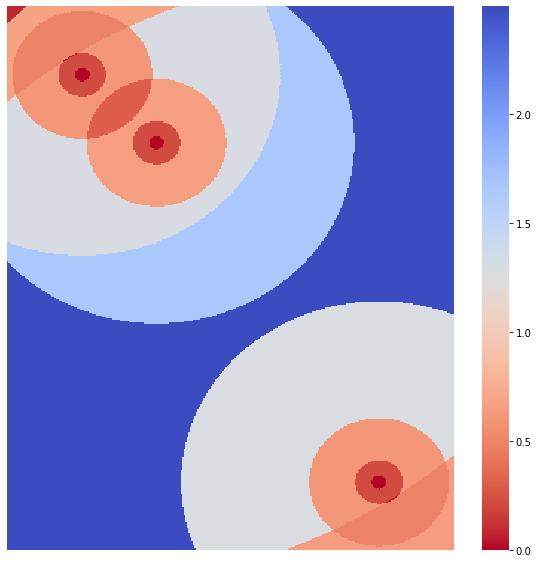

In [7]:
print(obj(solution.x))
draw_accuracies(beacon_locations_from_x(solution.x))

In [64]:
from utils import cartesian_cross_product
res = np.apply_along_axis(obj, 1, cartesian_cross_product(np.arange(0, 3, 0.1), np.arange(0, 4, 0.1)))